<a href="https://colab.research.google.com/github/Monocyte572/project/blob/main/project%20/Pixel_RGB/RGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pillow

In [1]:
## #그림 불러오기 및 그림 크기 확인
from PIL import Image
import numpy as np
im=Image.open('/content/sample.jpg')
pix=np.array(im)
print(im.size)

(3007, 2255)


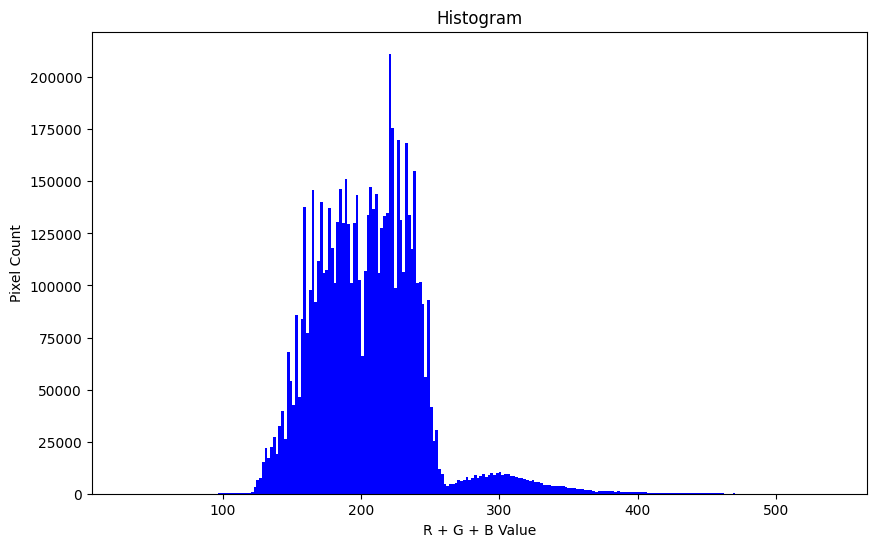

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd


height, width = pix.shape[0], pix.shape[1]

all_data = np.zeros((height, width, 3), dtype=np.uint8)

for y in range(height):
    for x in range(width):
        r, g, b = pix[y][x]
        all_data[y][x] = [r, g, b]


rgb_sum = [pixel_info[0] + pixel_info[1] + pixel_info[2] for row in all_data for pixel_info in row]
plt.figure(figsize=(10, 6))
plt.hist(rgb_sum, bins=256, color='blue')
plt.xlabel('R + G + B Value')
plt.ylabel('Pixel Count')
plt.title('Histogram')
plt.show()

Filtered pixel count: 383488


/tmp/ipython-input-371233713.py:30: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  filtered_im = Image.fromarray(filtered_im_data, 'RGB')


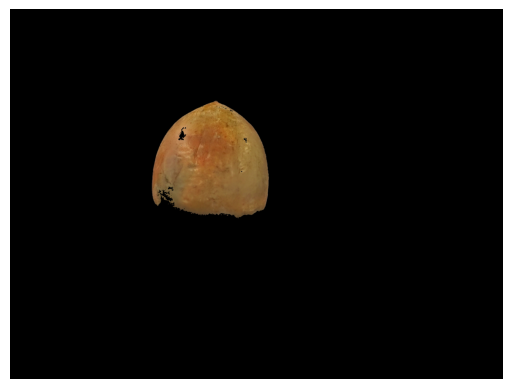

In [11]:
## 픽셀 별 RGB 추출한 다음, 배경 제거
rgb_values = []
height, width = pix.shape[0], pix.shape[1]

for y in range(height):
    for x in range(width):
        rgb = pix[y][x]
        rgb_values.append(rgb)

pixel_count = 0
filtered_pixels = []

for y in range(height):
    for x in range(width):
        r, g, b = pix[y][x]

        ## 그냥 감 픽셀 찾아달라고 gpt 함.
        if (r > 80 and g > 40 and b < 100) and (r > g + 20):
          filtered_pixels.append([pixel_count, x, y, r, g, b])
          pixel_count += 1

print(f"Filtered pixel count: {len(filtered_pixels)}")

filtered_im_data = np.zeros((height, width, 3), dtype=np.uint8)

for pixel_info in filtered_pixels:
    pixel_index, x, y, r, g, b = pixel_info
    filtered_im_data[y][x] = [r, g, b]

filtered_im = Image.fromarray(filtered_im_data, 'RGB')

import matplotlib.pyplot as plt
plt.imshow(filtered_im)
plt.axis('off') # Turn off axis numbers and ticks
plt.show()

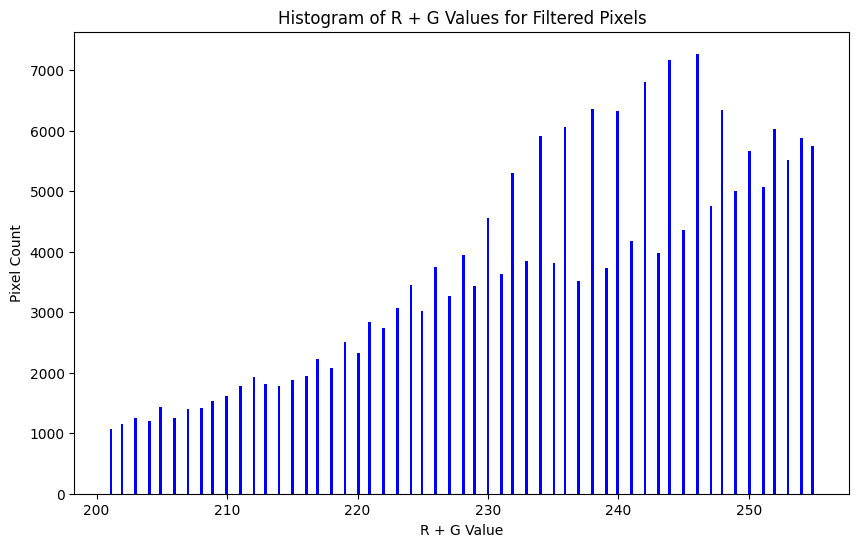

In [ ]:
## 그래프 히스토그램으로 그리기

import matplotlib.pyplot as plt
import pandas as pd

r_g_sum = [pixel_info[3] + pixel_info[4] for pixel_info in filtered_pixels]

plt.figure(figsize=(10, 6))
plt.hist(r_g_sum, bins=256, color='blue')
plt.xlabel('R + G Value')
plt.ylabel('Pixel Count')
plt.title('Histogram')
plt.show()